#### Important Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
from shutil import copyfile
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
classes = os.listdir('c:Downloads/train/') #Total number of classes
os.mkdir('master_data') #Making a directory named "master_data"
os.mkdir('master_data/training') #Making a "training" folder in master_data folder
os.mkdir('master_data/testing') # making a "testing" folder in master_data folder

In [3]:
#creating the folders for each classes in training and testing folder.
for i in classes:
    os.mkdir(os.path.join('master_data/training', i))
    os.mkdir(os.path.join('master_data/testing', i))

In [4]:
'''so basically i am provided with the training dataset now, my task is to train a model using this dataset with high accuracy.
in order to validate the model. i will need a testing data. so, here i am making two datasets named traing and testing 
respectively. i will train the model using traing dataset and for the validation part i will use testing dataset.'''
split_size = 0.9
for i in classes:
    images = os.listdir(os.path.join('c:Downloads/train/', i))
    train_size = int(len(images) * split_size)
    train_images = images[:train_size]
    test_images = images[train_size:]
    for image in train_images:
        source = os.path.join('c:Downloads/train/',i , image)
        dest = os.path.join('master_data/training/', i, image)
        copyfile(source, dest)
    for image in test_images:
        source = os.path.join('c:Downloads/train/',i , image)
        dest = os.path.join('master_data/testing/', i, image)
        copyfile(source, dest)

In [5]:
'''path of traing and testing data'''
train_dir = 'master_data/training'
test_dir = 'master_data/testing'

In [6]:
'''Here, I am using ImageDataGenerator Class and i have stored the data in directory format therefore i am using the function
flow_from_directory'''
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(
                                                      train_dir,
                                                      target_size = (64,64),
                                                      class_mode = 'categorical',
                                                      batch_size = 32
                                                    )

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
                                                      test_dir,
                                                      target_size = (64,64),
                                                      class_mode = 'categorical',
                                                      batch_size = 32
                                                    )

Found 20177 images belonging to 10 classes.
Found 2247 images belonging to 10 classes.


###### Creating a Model

In [7]:
model = Sequential()

model.add(Conv2D(64,(3,3),padding='same', activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.summary() #Summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 512)         1

In [8]:
'''Compiling the Model'''
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['acc']) #Compiling the model

In [9]:
es = EarlyStopping(monitor='val_acc', patience=2, min_delta=0.01)

In [10]:
'''Fitting the model'''
history = model.fit_generator(train_generator,
                    epochs=5,
                    verbose=1,
                    validation_data=test_generator,
                   callbacks=[es])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 631 steps, validate for 71 steps
Epoch 1/5
631/631 [==============================] - 198s 314ms/step - loss: 1.0621 - acc: 0.6130 - val_loss: 0.1742 - val_acc: 0.9493
Epoch 2/5
631/631 [==============================] - 89s 142ms/step - loss: 0.1771 - acc: 0.9478 - val_loss: 0.0478 - val_acc: 0.9889
Epoch 3/5
631/631 [==============================] - 89s 141ms/step - loss: 0.0901 - acc: 0.9741 - val_loss: 0.0448 - val_acc: 0.9849
Epoch 4/5
631/631 [==============================] - 90s 143ms/step - loss: 0.0603 - acc: 0.9817 - val_loss: 0.0331 - val_acc: 0.9911


In [11]:
hist = history
import matplotlib.pyplot as plt

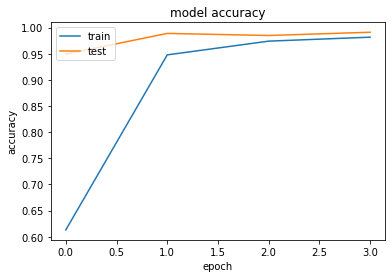

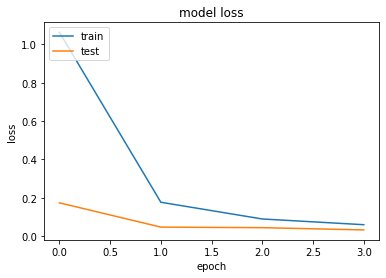

In [16]:
# Summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model accuracy.png')
plt.show()
# Summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model loss.png')
plt.show()